# IMPORTING THE DATA

I downloaded the publicly available data directly from the Inside Airbnb website. It covers all Austin listing details, calendar details, review details and associated geolocation information collected on September 19th, 2019. The data was published in the form of multiple csv files.
<ul>
    <li>Listings.csv - Detailed listings data for Austin</li>
	<li>Calendar.csv - Detailed calendar data for listings in Austin</li>
	<li>Reviews.csv - Detailed reviews data for listings in Austin</li>
	<li>Neighbourhoods.geojson - GeoJSON file of neighbourhoods of the city</li>
</ul>
I will use Python to import the csv files into my Jupyter notebook to clean and explore the data. 

In [373]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype
import re

# Read in the csv file
df = pd.read_csv('Data/listings.csv', low_memory=False)

# FEATURE SELECTION
Since there is no data dictionary available, I will familiarize myself with the columns to understand what each feature represents. This will help me to determine which columns I don't need and can remove, as to ensure that the data is used in the most productive and meaningful manner. 

I will inspect the shape of the data to determine how many columns and rows there are.

In [374]:
# Inspect the number of rows and columns
df.shape

(11339, 106)

There are 106 different columns in listings. I will inspect each and every column to determine which ones will be important for further processing, 20 columns at a time.

In [375]:
# Inspect the first 20 columns and first 5 rows
df.iloc[:5, :20]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id
0,2265,https://www.airbnb.com/rooms/2265,20190919050302,2019-09-19,Zen-East in the Heart of Austin (monthly rental),"Zen East is situated in a vibrant & diverse multicultural neighborhood, within walking distance ...",This colorful and clean 1923 house was completely remodeled in 2004. The house is a 2BR/ 2BA (13...,"Zen East is situated in a vibrant & diverse multicultural neighborhood, within walking distance ...",none,NaN,A 2013 Genuine Buddy Scooter 125 may be available to rent for $30 a day. Two people (~ 300 lbs...,5 min walk to Capitol Metro Rail (train that takes you downtown) and bus stops within a few minu...,"Several local restaurants, small clubs, music venues, convenience store and cafes within walking...","Depending on your dates and arrival time, I am usually available to meet and orient you to the h...",• Check-in time is 4 pm. Check out is 11 am. I may be able to accommodate earlier check in or la...,NaN,NaN,https://a0.muscache.com/im/pictures/4740524/63f823db_original.jpg?aki_policy=large,NaN,2466
1,5245,https://www.airbnb.com/rooms/5245,20190919050302,2019-09-19,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural neighborhood & within walking distance of many gre...,"This green, colorful, clean and cozy house was built in 1923 and remodeled in 2004. As the homeo...",Situated in a vibrant & diverse multicultural neighborhood & within walking distance of many gre...,none,NaN,Please note: A two story studio was built in the backyard in early 2017. You have a front porch...,NaN,NaN,"I should be available, upon your arrival, to answer any questions about the house, Austin, trans...",A brief profile for all guests along with photos is requested before your booking is accepted. H...,NaN,NaN,https://a0.muscache.com/im/pictures/5167505/b33b5f2e_original.jpg?aki_policy=large,NaN,2466
2,5456,https://www.airbnb.com/rooms/5456,20190919050302,2019-09-19,"Walk to 6th, Rainey St and Convention Ctr","Fabulous location for walking to Convention Center, Rainey Street, East 6th Street, Downtown, Co...",Cute Private Studio apartment located in Willow Spence National Historic District. It is walki...,"Fabulous location for walking to Convention Center, Rainey Street, East 6th Street, Downtown, Co...",none,"My neighborhood is ideally located if you want to walk to bars and restaurants downtown, East 6t...",Parking on street requires a permit. There is a $50 deposit to obtain a permit. 15% hotel taxes...,"Bus stop around the block. Uber, Lyft, Ride, scooters, bikes available.",Guests have access to patio.,I am happy to welcome my guests and show them in.,No Pets allowed. No smoking in the room. No moving furniture. No Parties.,NaN,NaN,https://a0.muscache.com/im/pictures/14084884/b5a35a84_original.jpg?aki_policy=large,NaN,8028
3,5769,https://www.airbnb.com/rooms/5769,20190919050302,2019-09-19,NW Austin Room,NaN,Looking for a comfortable inexpensive room to stay for a night? A week or more? Join us in our...,Looking for a comfortable inexpensive room to stay for a night? A week or more? Join us in our...,none,Quiet neighborhood with lots of trees and good neighbors.,NaN,"We are approximately 16 miles from downtown Austin. When not traveling during rush hour, I can ...",Gravel Parking Kitchen,We interact with our guests as little or as much as needed.,"I will need to see identification at check in. Keys will be provided at that time. Quiet, clean,...",NaN,NaN,https://a0.muscache.com/im/pictures/23822033/ac946aff_original.jpg?aki_policy=large,NaN,8186
4,6413,https://www.airbnb.com/rooms/6413,20190919050302,2019-09-19,Gem of a Studio near Downtown,"Great studio apartment, perfect for couples or singles. Just 1 mile into downtown. Convenient fo...","(License #114332) Large, conte

<b>From the first 20 columns, the following will remain</b>
	<ul>
    <li>id - unique identifier that could be used to join other data files</li>
    </ul>

In [376]:
# Inspect the next 20 columns and first 5 rows
df.iloc[:5, 20:40]

,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed
0,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned a few degrees at UT a few decades ago and practice...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_pic/1259094587/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/2466/profile_pic/1259094587/original.jpg?aki_policy=profile_x_m...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702
1,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned a few degrees at UT a few decades ago and practice...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/2466/profile_pic/1259094587/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/2466/profile_pic/1259094587/original.jpg?aki_policy=profile_x_m...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702
2,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner of Armadillo Realty. I attended The University of ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/8028/profile_pic/1329882962/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/8028/profile_pic/1329882962/original.jpg?aki_policy=profile_x_m...,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702
3,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, Texas, United States","We're easygoing professionals that enjoy meeting new people. I love martial arts, the outdoors,...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/8186/profile_pic/1272556663/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/8186/profile_pic/1272556663/original.jpg?aki_policy=profile_x_m...,SW Williamson Co.,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'government_id', 'work_email']",t,t,"Austin, TX, United States",SW Williamson Co.,78729
4,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we just don't get to enough. So we live vicariously t...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/4f35ef11-7f37-45cf-80da-f914a6d5f451.jpg?aki_policy=profile_...,https://a0.muscache.com/im/pictures/4f35ef11-7f37-45cf-80da-f914a6d5f451.jpg?aki_policy=profile_...,Travis Heights,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'iden...",t,f,"Austin, TX, United States",Travis Heights,78704


<b>From the next 20 columns, the following will remain</b>
	<ul>
    <li>neighbourhood_cleansed - zip code of the neighbourhood the listing is in</li>
    </ul>

In [377]:
# Inspect the next 20 columns and first 5 rows
df.iloc[:5, 40:60]

,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet
0,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,""Free parking on premises"",""Paid parking...",NaN
1,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.27577,-97.71379,t,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,""Free parking on premises"",Breakfast,""Pe...",NaN
2,NaN,Austin,TX,78702,Austin,"Austin, TX",US,United States,30.26112,-97.73448,t,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live on this property"",Dog(s),Cat(s),""Free street park...",NaN
3,NaN,Austin,TX,78729,Austin,"Austin, TX",US,United States,30.45596,-97.78370,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,""Free parking on premises"",""Pets live on...",NaN
4,NaN,Austin,TX,78704,Austin,"Austin, TX",US,United States,30.24829,-97.73726,t,Guesthouse,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,""Pets live on this property"",Cat(s),Heat...",550.0


<b>From the next 20 columns, the following will remain</b>
	<ul>
    <li>latitude - measurement location north or south of the equator</li>
    <li>longitude - measurement location east or west of the Prime Meridian </li>
    <li>room_type - type of listing space, ie. entire home or room</li>
    <li>accommodates - number of allowed guests</li>
    <li>bathrooms - number of bathrooms</li>
    <li>bedrooms - number of bedrooms</li>
    <li>beds - number of beds</li>
    </ul>

In [378]:
# Inspect the next 20 columns and first 5 rows
df.iloc[:5, 60:80]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90
0,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,6 weeks ago,t,0,0,0
1,$100.00,NaN,NaN,$500.00,$75.00,2,$35.00,30,60,30,30,60,60,30.0,60.0,3 months ago,t,11,11,11
2,$95.00,NaN,NaN,$100.00,NaN,2,$45.00,2,90,2,2,90,90,2.0,90.0,2 weeks ago,t,2,11,35
3,$40.00,$160.00,NaN,NaN,NaN,2,$0.00,1,14,1,1,14,14,1.0,14.0,3 days ago,t,6,6,13
4,$99.00,$700.00,"$1,900.00",NaN,$50.00,2,$25.00,3,365,3,4,365,365,3.0,365.0,1 week ago,t,0,0,0


<b>From the next 20 columns, the following will remain</b>
	<ul>
    <li>price - average price per night</li>
    <li>minimum_nights - minimum amount of nights to book</li>
    </ul>

In [379]:
# Inspect the next 20 columns and first 5 rows
df.iloc[:5, 80:100]

,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture
0,0,2019-09-19,24,1,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f
1,11,2019-09-19,9,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f
2,291,2019-09-19,499,46,2009-03-08,2019-09-14,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f
3,13,2019-09-19,253,16,2010-04-10,2019-08-22,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Texas State""}",f,f,moderate,t
4,0,2019-09-19,100,23,2009-12-14,2019-08-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,32041657928,"{""Texas State""}",t,f,strict_14_with_grace_period,f


<b>From the next 20 columns, the following will remain</b>
	<ul>
    <li>number_of_reviews - number of reviews</li>
    <li>review_scores_rating - the rating score determined by reviews</li>
    </ul>

In [380]:
df.iloc[:5, 100:]

,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,f,3,2,1,0,0.19
1,f,3,2,1,0,0.07
2,t,1,1,0,0,3.89
3,t,1,0,1,0,2.20
4,f,1,1,0,0,0.84


<b>No columns will remain from the last set of columns.</b>

I will extract only the columns of interest, store it in a new dataframe and ensure all of the columns are there.

In [381]:
# Create new dataframe with important columns and inspect it
df = df[['id', 'neighbourhood_cleansed', 'latitude', 'longitude', 
            'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
            'price', 'minimum_nights', 'number_of_reviews', 
            'review_scores_rating']]

# Rename the id column to listing_id
df.rename(columns = {'id':'listing_id'}, inplace = True)

# Reset index to the listing id
new_df = df.set_index('listing_id')

new_df.head(5)

,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating
listing_id,,,,,,,,,,,,
2265,78702,30.27750,-97.71398,Entire home/apt,4,2.0,2.0,2.0,$225.00,30,24,93.0
5245,78702,30.27577,-97.71379,Private room,2,1.0,1.0,2.0,$100.00,30,9,91.0
5456,78702,30.26112,-97.73448,Entire home/apt,3,1.0,1.0,2.0,$95.00,2,499,96.0
5769,78729,30.45596,-97.78370,Private room,2,1.0,1.0,1.0,$40.00,1,253,98.0
6413,78704,30.24829,-97.73726,Entire home/apt,2,1.0,NaN,1.0,$99.00,3,100,99.0


For my exploratory analysis later, I will need some information related to amount of calendar bookings per listing. I will put these values into a new column. Then I will merge the this dataframe with the main dataframe.

In [382]:
# Read in detailed calendar data 
df_calendar = pd.read_csv('Data/calendar.csv')

# Get subset of calendar data where the listing was not available, ie., booked
df_calendar  = df_calendar[df_calendar['available'] == 'f']

# Get amount of bookings this year per listing 
df_calendar = df_calendar.groupby('listing_id').size().to_frame()

# Change column name to something more sensible
df_calendar.columns = ['number_of_bookings']

# Merge the calendar data with the main dataframe
new_df = pd.merge(left=new_df, right=df_calendar, how='left', left_on='listing_id', right_on='listing_id')

# For the missing values in number_of_bookings column due to no bookings yet, set to zero
new_df['number_of_bookings'] = new_df['number_of_bookings'].fillna(0)

print(new_df.info())
new_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11339 entries, 2265 to 38732317
Data columns (total 13 columns):
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null object
accommodates              11339 non-null int64
bathrooms                 11321 non-null float64
bedrooms                  11332 non-null float64
beds                      11328 non-null float64
price                     11339 non-null object
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      8759 non-null float64
number_of_bookings        11339 non-null float64
dtypes: float64(7), int64(4), object(2)
memory usage: 1.2+ MB
None


,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,number_of_bookings
listing_id,,,,,,,,,,,,,
2265,78702,30.27750,-97.71398,Entire home/apt,4,2.0,2.0,2.0,$225.00,30,24,93.0,365.0
5245,78702,30.27577,-97.71379,Private room,2,1.0,1.0,2.0,$100.00,30,9,91.0,354.0
5456,78702,30.26112,-97.73448,Entire home/apt,3,1.0,1.0,2.0,$95.00,2,499,96.0,74.0
5769,78729,30.45596,-97.78370,Private room,2,1.0,1.0,1.0,$40.00,1,253,98.0,352.0
6413,78704,30.24829,-97.73726,Entire home/apt,2,1.0,NaN,1.0,$99.00,3,100,99.0,365.0


In [383]:
# Drop any duplicates in the data
new_df.drop_duplicates()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11339 entries, 2265 to 38732317
Data columns (total 13 columns):
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null object
accommodates              11339 non-null int64
bathrooms                 11321 non-null float64
bedrooms                  11332 non-null float64
beds                      11328 non-null float64
price                     11339 non-null object
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      8759 non-null float64
number_of_bookings        11339 non-null float64
dtypes: float64(7), int64(4), object(2)
memory usage: 1.2+ MB


The numbers haven't changed so there were no duplicates rows.

In general, the cleaning and preparation also involves fixing structural issues, handling missing data and managing outliers. These processes will be explained in more detail.

# CLEANING THE DATA
First I will inspect the new dataframe on it's data types.

In [384]:
# Check for data types and missing values
new_df.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11339 entries, 2265 to 38732317
Data columns (total 13 columns):
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null object
accommodates              11339 non-null int64
bathrooms                 11321 non-null float64
bedrooms                  11332 non-null float64
beds                      11328 non-null float64
price                     11339 non-null object
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      8759 non-null float64
number_of_bookings        11339 non-null float64
dtypes: float64(7), int64(4), object(2)
memory usage: 1.2+ MB


<b>Upon observation, I will do the following</b>
<ul>
    <li>update price object type to float type</li>
     <li>update room_type object type to categorical type</li>
    <li>handle missing values in bathrooms, bedrooms, beds and review_scores_rating </li>
</ul>

The price column contains the $ symbol so it may be a string. I will check to see if it is of string data type. If so, I will need to convert the column to a float. This will make help with aggregations and visualizations later in the process.

In [385]:
# Check if the 'price' Series is of string type
is_string_dtype(new_df['price'])

True

In [386]:
# Remove all $ and , symbols from the 'price' Series and convert the values from string to float type
new_df.loc[:,'price'] = new_df.loc[:,'price'].str.replace('[,$]', '', regex=True).astype(float)

# Check the updated data type
new_df['price'].dtype

dtype('float64')

I will convert property_type and room_type object to either categorical.



In [387]:
# Select columns to be of categorical type
new_df['room_type'] = new_df['room_type'].astype('category')
new_df['room_type'].dtypes

CategoricalDtype(categories=['Entire home/apt', 'Hotel room', 'Private room',
                  'Shared room'],
                 ordered=False)

Since the review_scores_rating column has more than 20% missing values, I will inspect the data related to reviews further to determine how I should handle it. More specifically, I will take a look at the rows which have a missing review_scores_rating value.

In [388]:
# Get subset of dataframe that is related to reviews 
reviews = new_df[['number_of_reviews', 'review_scores_rating']]

# Get subset of reviews that has a missing review score
reviews_nan = reviews[pd.isnull(reviews['review_scores_rating'])]
reviews_nan.head(10)

,number_of_reviews,review_scores_rating
listing_id,,
53639,0,NaN
77347,0,NaN
228217,0,NaN
269200,0,NaN
314152,0,NaN
318963,1,NaN
321069,1,NaN
331549,0,NaN
333114,0,NaN


As suspected, there are several rows with 0 number_of_reviews, therefore the reviews_scores_rating cannot be calculated. I will flag these with a -1. 

In [389]:
# Loop through the data frame, update review_scores_rating to -1 if the number_of_reviews is 0 
for i, row in new_df.iterrows():
    if row['number_of_reviews'] == 0:
       new_df.loc[i, 'review_scores_rating'] = -1

new_df[['number_of_reviews', 'review_scores_rating']].tail(10)

,number_of_reviews,review_scores_rating
listing_id,,
38718339,0,-1.0
38720405,0,-1.0
38723815,0,-1.0
38724103,0,-1.0
38725935,0,-1.0
38726612,0,-1.0
38727516,1,NaN
38728146,0,-1.0
38728874,0,-1.0


Interestingly, there are some rows with more than 0 number_of_reviews still resulting in missing values. I will inspect this further by looking at the rows with numbers_of_reviews > 0 and reviews_score_rating = 0.

In [390]:
# Get subset of previous reviews subset that have more than 0 number of reviews
reviews_nan_notzero = reviews_nan[reviews_nan['number_of_reviews'] > 0]

# Get the count of how many records have more than 0 number of reviews and missing review scores
print(reviews_nan_notzero.count())
reviews_nan_notzero.head(5)

number_of_reviews       120
review_scores_rating      0
dtype: int64


,number_of_reviews,review_scores_rating
listing_id,,
318963,1,NaN
321069,1,NaN
942843,1,NaN
2385724,2,NaN
4356661,1,NaN


I will pull in the detailed reviews data for further analysis and inspect the first 5 records.

In [391]:
# Pull in the detailed reviews data into a data frame
df_reviews = pd.read_csv('Data/reviews.csv')
df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2265,963,2009-03-17,7538,Niall,I stayed here during SXSW and had a really pleasant stay. The house is a very relaxing environm...
1,2265,1057,2009-03-22,10029,Michael,"Great place, close enough to everything downtown Austin has, yet just far enough to be relaxing ..."
2,2265,200418,2011-03-16,61677,Gustaf,We had a great time in Austin staying at Paddy's house. The house is much larger than it looks o...
3,2265,1001630,2012-03-15,1523753,Noah,We had a great stay at Zen East for South By Southwest! Paddy was extremely accommodating and w...
4,2265,1016390,2012-03-19,1547660,Melissa,"I arrived late in the evening so did not meet Paddy, but her home was lovely and clean and welco..."


In [392]:
# Set index as the listing id and get a subset of the important columns
df_reviews = df_reviews.set_index('listing_id')
df_reviews = df_reviews[['date', 'comments']]
df_reviews.head(5)

,date,comments
listing_id,,
2265,2009-03-17,I stayed here during SXSW and had a really pleasant stay. The house is a very relaxing environm...
2265,2009-03-22,"Great place, close enough to everything downtown Austin has, yet just far enough to be relaxing ..."
2265,2011-03-16,We had a great time in Austin staying at Paddy's house. The house is much larger than it looks o...
2265,2012-03-15,We had a great stay at Zen East for South By Southwest! Paddy was extremely accommodating and w...
2265,2012-03-19,"I arrived late in the evening so did not meet Paddy, but her home was lovely and clean and welco..."


<b>I will combine the following two dataframes for further inspection</b>
<ul>
    <li>df_reviews - subset of detailed reviews data containing the date and comments for each listing_id</li>
    <li>reviews_nan_notzero - subset of detailed listings data containing listing id where number of reviews > 0
    and review scores are missing</li>
</ul>

In [393]:
# Combine the 2 relevant dataframes
nan_df_review = pd.concat([df_reviews, reviews_nan_notzero], axis=1)

# Expand the cell to allow more characters
pd.set_option('max_colwidth', 100)

# Subset the records that have more than 0 number of reviews
nan_df_review = nan_df_review[nan_df_review['number_of_reviews'] > 0]
nan_df_review.tail(10)

,date,comments,number_of_reviews,review_scores_rating
listing_id,,,,
37691922,2019-08-13,The host canceled this reservation 3 days before arrival. This is an automated posting.,1.0,NaN
38019196,2019-09-06,The host canceled this reservation 7 days before arrival. This is an automated posting.,1.0,NaN
38044635,2019-09-11,The host canceled this reservation 30 days before arrival. This is an automated posting.,1.0,NaN
38123653,2019-09-14,The host canceled this reservation 48 days before arrival. This is an automated posting.,1.0,NaN
38167787,2019-08-29,The host canceled this reservation 9 days before arrival. This is an automated posting.,1.0,NaN
38297689,2019-09-08,The host canceled this reservation 20 days before arrival. This is an automated posting.,1.0,NaN
38596517,2019-09-13,The host canceled this reservation 21 days before arrival. This is an automated posting.,1.0,NaN
38646013,2019-09-17,The host canceled this reservation 44 days before arrival. This is an automated posting.,1.0,NaN
38703706,2019-09-18,The host canceled this reservation 15 days before arrival. This is an automated posting.,1.0,NaN


If the listing has more than 0 number_of_reviews and has a missing review_scores_rating, there is a commonality of an automated review comment due to a cancelled reservation. Which means there were no real reviews yet. I will flag these with -2. 

In [394]:
# Loop through the data frame, update review_scores_rating to -2 if the number_of_reviews is 0 
for i, row in new_df.iterrows():
    if (row['number_of_reviews'] > 0) & (pd.isnull(row['review_scores_rating'])):
       new_df.loc[i, 'review_scores_rating'] = -2

new_df[['number_of_reviews', 'review_scores_rating']].tail(10)

,number_of_reviews,review_scores_rating
listing_id,,
38718339,0,-1.0
38720405,0,-1.0
38723815,0,-1.0
38724103,0,-1.0
38725935,0,-1.0
38726612,0,-1.0
38727516,1,-2.0
38728146,0,-1.0
38728874,0,-1.0


I will check to see if there are any more missing review_scores_rating values in the main dataframe.

In [395]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11339 entries, 2265 to 38732317
Data columns (total 13 columns):
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null category
accommodates              11339 non-null int64
bathrooms                 11321 non-null float64
bedrooms                  11332 non-null float64
beds                      11328 non-null float64
price                     11339 non-null float64
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      11339 non-null float64
number_of_bookings        11339 non-null float64
dtypes: category(1), float64(8), int64(4)
memory usage: 1.4 MB


For missing bathrooms, bedrooms and beds I will create a function that will impute the median of the feature based on a correlated feature. For example, in the case of missing bathrooms value, if the record has a one bedroom, I will impute the median number of bathrooms for all one bedroom listings. 

In [396]:
# Define function for imputing the mean based on the missing feature value and correlated feature
def impute_median(df, impute_median, corr):
    for i, record in df.iterrows():
        median = int(new_df[new_df[corr] == record[corr]][impute_median].median())
        new_df.loc[i, impute_median] = median

Impute the median number of bathrooms based on correlated number of bedrooms using the impute_median function.

In [397]:
# Get subset of dataaframe where there is missing bathrooms data
nan_bathroom = new_df[pd.isnull(new_df['bathrooms'])]

# Call function to impute the mean
impute_median(df=nan_bathroom, impute_median='bathrooms', corr='bedrooms')

Impute the median number of bedrooms based on correlated number of bathrooms using the impute_median function.

In [398]:
# Get subset of dataaframe where there is missing bedrooms data
nan_bedrooms = new_df[pd.isnull(new_df['bedrooms'])]

# Call function to impute the mean
impute_median(df=nan_bedrooms, impute_median='bedrooms', corr='bathrooms')  

Impute the median number of bed based on correlated number of accommodates using the impute_median function.

In [399]:
# Get subset of dataaframe where there is missing beds data
nan_beds = new_df[pd.isnull(new_df['beds'])]

# Call function to impute the mean
impute_median(df=nan_beds, impute_median='beds', corr='accommodates')   

Inspect that all data types are correct and there is no more missing data.

In [400]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11339 entries, 2265 to 38732317
Data columns (total 13 columns):
neighbourhood_cleansed    11339 non-null int64
latitude                  11339 non-null float64
longitude                 11339 non-null float64
room_type                 11339 non-null category
accommodates              11339 non-null int64
bathrooms                 11339 non-null float64
bedrooms                  11339 non-null float64
beds                      11339 non-null float64
price                     11339 non-null float64
minimum_nights            11339 non-null int64
number_of_reviews         11339 non-null int64
review_scores_rating      11339 non-null float64
number_of_bookings        11339 non-null float64
dtypes: category(1), float64(8), int64(4)
memory usage: 1.4 MB


There are no more missing values so I will proceed to handling any outliers.

# HANDLING OUTLIERS

I will identify features with outliers and decide whether keeping these outliers is necessary for the overall analysis. I will inspect each numerical column and look for significant differences. I will also inspect the gap between the min and 1st/10th percentiles, and the max and 90th/99th percentiles, as these can also make outliers apparent.

In [401]:
# View the basic statistical details of specific columns of the dataframe
new_df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews',
        'review_scores_rating', 'number_of_bookings']].describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,number_of_bookings
count,11339.000000,11339.000000,11339.000000,11339.000000,11339.00000,11339.000000,11339.000000,11339.000000,11339.000000
mean,4.710821,1.550071,1.787371,2.556663,390.70112,5.082988,29.006262,74.090043,233.398360
std,3.258878,0.892224,1.268377,2.787885,1128.82863,20.223087,58.114834,41.212349,135.097541
min,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,-2.000000,0.000000
1%,1.000000,1.000000,0.000000,1.000000,23.00000,1.000000,0.000000,-2.000000,0.000000
10%,2.000000,1.000000,1.000000,1.000000,50.00000,1.000000,0.000000,-1.000000,21.000000
25%,2.000000,1.000000,1.000000,1.000000,80.00000,1.000000,1.000000,80.000000,95.000000
50%,4.000000,1.000000,1.000000,2.000000,145.00000,2.000000,6.000000,97.000000,283.000000
75%,6.000000,2.000000,2.000000,3.000000,300.00000,2.000000,29.000000,100.000000,365.000000
90%,8.200000,2.500000,3.000000,5.000000,669.00000,5.000000,85.000000,100.000000,365.000000


From a rough inspection of the summary statistics, I can see a number of variables that seem to contain outliers. I will analyze the outliers that I'm unsure about further through data visualizations, starting first with number of accommodates and work my way down the list of features that contain outliers.

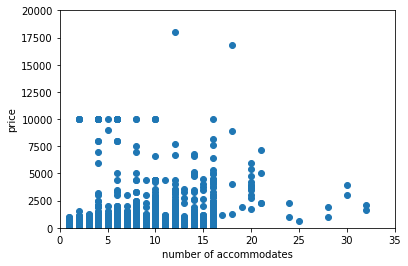

In [402]:
plt.xlim(0, 35)
plt.ylim(0, 20000)
plt.xlabel('number of accommodates')
plt.ylabel('price')
plt.scatter(new_df.accommodates, new_df.price)

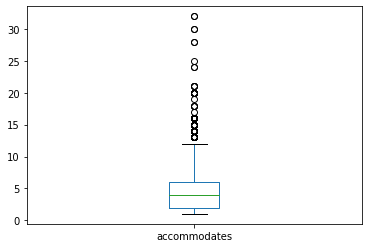

In [403]:
new_df['accommodates'].plot.box()

From the plots, I see a few obvious outliers with accomodates - the records that have price above \$16,000 and the records with more than 23 accommodates.

Next I will analyze bathrooms.

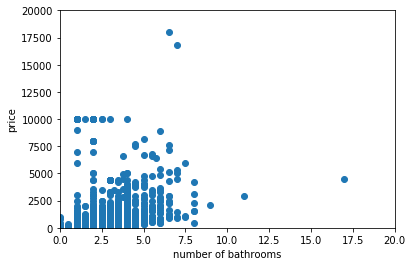

In [404]:
plt.xlim(0, 20)
plt.ylim(0, 20000)
plt.xlabel('number of bathrooms')
plt.ylabel('price')
plt.scatter(new_df.bathrooms, new_df.price)

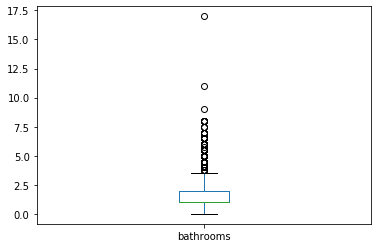

In [405]:
new_df['bathrooms'].plot.box()

From the plots, I see a few obvious outliers with bathrooms - the records over \$16,000 and the records that has more than 10 bathrooms.

Next I will analyze bedrooms.

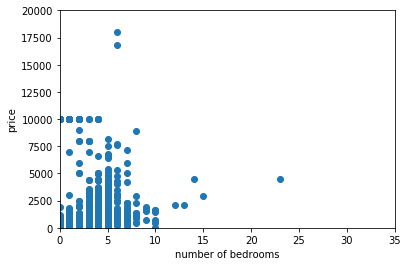

In [406]:
plt.xlim(0, 35)
plt.ylim(0, 20000)
plt.xlabel('number of bedrooms')
plt.ylabel('price')
plt.scatter(new_df.bedrooms, new_df.price)

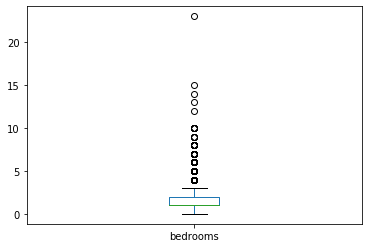

In [407]:
new_df['bedrooms'].plot.box()

From the plots, I see a few obvious outliers with bedrooms - the records over \$16,000 and the records with over 10 bedrooms.

Next I will analyze beds.

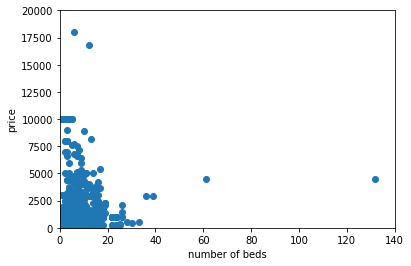

In [408]:
plt.xlim(0, 140)
plt.ylim(0, 20000)
plt.xlabel('number of beds')
plt.ylabel('price')
plt.scatter(new_df.beds, new_df.price)

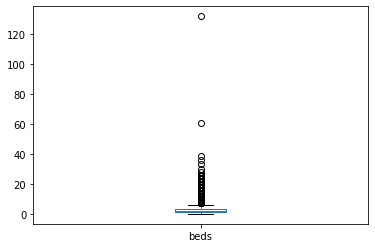

In [409]:
new_df['beds'].plot.box()

From the plots, I see a few obvious outliers with beds - the records over \$16,000 and the records over 38 beds. Many of the dots are clumped up towards the left so I will take a closer look.

I will take a closer look at the beds data.

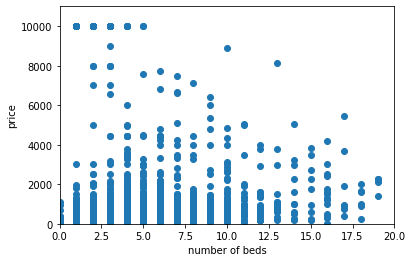

In [410]:
plt.xlim(0, 20)
plt.ylim(0, 11000)
plt.xlabel('number of beds')
plt.ylabel('price')
plt.scatter(new_df.beds, new_df.price)

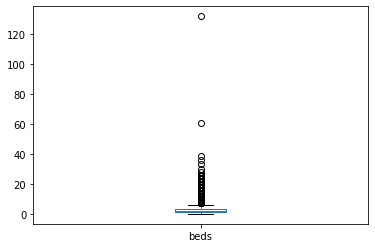

In [411]:
new_df['beds'].plot.box()

Next I will inspect records where price is less than the 1th percentile.

In [412]:
# Get subset of dataframe where price is less than 1th percentile and greater than 99th percentile
new_df[(new_df['price'] < new_df['price'].quantile(0.01))].sort_values(by='price')

,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,number_of_bookings
listing_id,,,,,,,,,,,,,
377391,78704,30.23589,-97.76997,Entire home/apt,2,1.0,1.0,1.0,0.0,1,1,100.0,365.0
20320755,78704,30.25078,-97.77511,Entire home/apt,6,1.0,2.0,3.0,0.0,2,6,97.0,18.0
20541331,78704,30.24890,-97.75526,Private room,2,1.0,1.0,1.0,0.0,3,2,100.0,365.0
21838615,78721,30.25990,-97.68495,Entire home/apt,8,2.0,3.0,4.0,0.0,5,5,100.0,362.0
21378172,78704,30.25472,-97.77659,Entire home/apt,10,2.0,4.0,8.0,0.0,3,12,100.0,300.0
20269052,78701,30.27037,-97.74859,Private room,3,1.0,1.0,1.0,0.0,5,0,-1.0,365.0
20708014,78757,30.35677,-97.73947,Private room,5,1.5,1.0,1.0,1.0,1,0,-1.0,365.0
20654658,78745,30.19341,-97.79261,Private room,3,0.0,0.0,3.0,1.0,1,0,-1.0,365.0
20674436,78704,30.23816,-97.74314,Entire home/apt,5,1.0,2.0,3.0,1.0,2,2,100.0,365.0


There are several listings with a price of \$0. Perhaps this was the price at the time the data scraping occurred and the host changed it soon after (maybe these were new listings). I don't trust these prices so I will remove the 6 records altogether.

In [413]:
# Get subset of data where price is more than 0
new_df = new_df[new_df['price'] > 0]

In [414]:
# Check that the statistics reflects the recent updates of trimming
new_df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 
        'price']].describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

,accommodates,bathrooms,bedrooms,beds,price
count,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000
mean,4.710580,1.550185,1.787258,2.556428,390.907968
std,3.258954,0.892380,1.268425,2.788003,1129.091623
min,1.000000,0.000000,0.000000,0.000000,1.000000
1%,1.000000,1.000000,0.000000,1.000000,23.000000
10%,2.000000,1.000000,1.000000,1.000000,50.000000
25%,2.000000,1.000000,1.000000,1.000000,80.000000
50%,4.000000,1.000000,1.000000,2.000000,145.000000
75%,6.000000,2.000000,2.000000,3.000000,300.000000
90%,8.000000,2.500000,3.000000,5.000000,669.000000


In [415]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11333 entries, 2265 to 38732317
Data columns (total 13 columns):
neighbourhood_cleansed    11333 non-null int64
latitude                  11333 non-null float64
longitude                 11333 non-null float64
room_type                 11333 non-null category
accommodates              11333 non-null int64
bathrooms                 11333 non-null float64
bedrooms                  11333 non-null float64
beds                      11333 non-null float64
price                     11333 non-null float64
minimum_nights            11333 non-null int64
number_of_reviews         11333 non-null int64
review_scores_rating      11333 non-null float64
number_of_bookings        11333 non-null float64
dtypes: category(1), float64(8), int64(4)
memory usage: 1.1 MB


<b>I will save the cleaned file for easy access. Next step in the process is Exploratory Data Analysis.</b> 

In [416]:
new_df.to_csv('Data/airbnb_clean.csv', index=False)